# Building an Medical Image Classifier using Deep Learning

## 1, Import Dependencies and Load the data on Dir  

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [4]:
# Set the paths for the data
train_path = "./train"
test_path = "./test"


### About Dataset  
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia  
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).  
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.  
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.  
Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5  

## 2, Set up data generators for training and testing a neural network model.   
### The data generators use the Keras ImageDataGenerator class to perform data augmentation on the input images.  

The img_size variable sets the size of the input images to be (256,256).  
The batch_size variable sets the number of images to be processed in each batch during training and testing.  
The train_data object is an ImageDataGenerator that applies several image transformations to the training data, including rescaling the pixel   values to be between 0 and 1, random rotations, shifts in the width and height directions, shearing, zooming, and horizontal and vertical flips.   
These transformations are meant to increase the diversity of the training data and prevent overfitting of the model.  
The test_data object is an ImageDataGenerator that only rescales the pixel values to be between 0 and 1 for the testing data.  
The flow_from_directory method of the train_data and test_data objects generates batches of augmented images and their corresponding labels on the fly from the directories specified by train_path and test_path. The target_size argument sets the size of the images to be generated, batch_size specifies the number of images to be generated in each batch, and class_mode specifies the type of labels to be generated. In this case, class_mode is set to 'categorical', indicating that the labels are one-hot encoded vectors for a multi-class classification problem.  





In [5]:
# Set the image size and batch size
img_size = (256, 256)
batch_size = 32

# Set up the data generators for training and testing data
train_data = ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)

test_data = ImageDataGenerator(rescale=1./255)
train_generator = train_data.flow_from_directory(train_path,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

test_generator = test_data.flow_from_directory(test_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## 3, Building a convolutional neural network (CNN) model using Keras with the following architecture:  

Four convolutional layers with 32, 64, 128, and 256 filters respectively, each followed by a max-pooling layer of size (2,2).  
A flatten layer to convert the output from the convolutional layers into a 1D array.  
Two fully connected dense layers with 128 and 64 units respectively, each followed by a dropout layer to prevent overfitting.  
A final dense layer with 2 units and a softmax activation function, which outputs the class probabilities for a binary classification problem.  
The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.  
Note that the input images to the CNN should have a size of (256,256,3), where the last dimension corresponds to the RGB color channels.  

In [6]:
# Build the model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## 4, Train the model  
call the train_agent() function in your Python script. This function initializes the agent, defines the hyperparameters, and trains the agent using the replay() function.

In [7]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
163/163 [==============================] - 208s 1s/step - loss: 0.4384 - accuracy: 0.7753 - val_loss: 0.4383 - val_accuracy: 0.8077
Epoch 2/10
163/163 [==============================] - 199s 1s/step - loss: 0.3563 - accuracy: 0.8340 - val_loss: 0.5322 - val_accuracy: 0.7484
Epoch 3/10
163/163 [==============================] - 194s 1s/step - loss: 0.3228 - accuracy: 0.8579 - val_loss: 0.6557 - val_accuracy: 0.6811
Epoch 4/10
163/163 [==============================] - 195s 1s/step - loss: 0.2831 - accuracy: 0.8696 - val_loss: 0.4137 - val_accuracy: 0.8381
Epoch 5/10
163/163 [==============================] - 198s 1s/step - loss: 0.2700 - accuracy: 0.8844 - val_loss: 0.4116 - val_accuracy: 0.8269
Epoch 6/10
163/163 [==============================] - 199s 1s/step - loss: 0.2621 - accuracy: 0.8875 - val_loss: 0.5547 - val_accuracy: 0.7901
Epoch 7/10
163/163 [==============================] - 201s 1s/step - loss: 0.2528 - accuracy: 0.8932 - val_loss: 0.4040 - val_accuracy: 0.8446

In [12]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.438436,0.775307,0.438259,0.807692
1,0.356345,0.833972,0.532229,0.748397
2,0.322826,0.857937,0.655729,0.681090
3,0.283109,0.869632,0.413720,0.838141
4,0.269991,0.884394,0.411650,0.826923
5,0.262105,0.887462,0.554660,0.790064
6,0.252752,0.893213,0.403988,0.844551
7,0.243149,0.894172,0.371260,0.858974
8,0.242228,0.893405,0.438474,0.839744
9,0.226902,0.901841,0.414785,0.854167


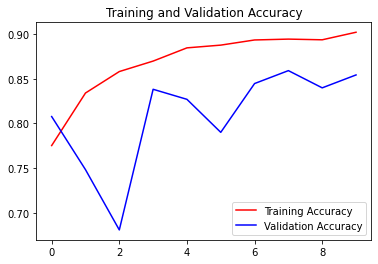

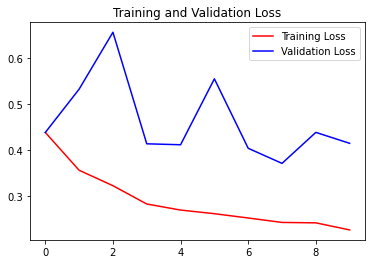

<Figure size 432x288 with 0 Axes>

In [8]:
# Visualize the training and validation loss and accuracy
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()


In [15]:
val_generator = test_data.flow_from_directory("./test",
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 624 images belonging to 2 classes.


In [17]:
import itertools
data_generator = itertools.chain(train_generator, test_generator)

In [19]:
history = model.fit(data_generator, epochs=5, validation_data=val_generator)


Epoch 1/5
     33/Unknown - 39s 1s/step - loss: 0.2105 - accuracy: 0.9062

KeyboardInterrupt: 